## 소비자물가지수-코로나확진자간 관계

In [147]:
import pandas as pd
import numpy as np

# 소비자물가지수 파일 로딩
total=pd.read_csv('소비자물가지수.csv')
total=total.iloc[:, 1:]
total=total.T

# 인덱스명 바꾸기
total=total.rename(index={'2019.1':'2019.10', '2020.1':'2020.10', '2021.1':'2021.10'})
total.rename(columns={0:'물가지수'}, inplace=True)

# 날짜 컬럼 인덱스 설정
D_list=total.index

# 날짜 컬럼 리스트로 전환
D_list=D_list.tolist()

# 물가지수 컬럼 리스트로 전환
num_list=total['물가지수'].tolist()

In [148]:
# 코로나확진자수 파일 로딩
corona=pd.read_excel('코로나확진자.xlsx', skiprows=4)
corona=corona.iloc[1:, 0:2]
corona['일자']=corona['일자'].astype('datetime64')

#'MONTH'컬럼 삽입
M=corona['일자'].dt.month
corona.insert(1, "MONTH", M)

#일자 컬럼 인덱스 설정 
corona.set_index('일자', inplace =True)

# 연도별 월별 평균값구하기
corona_2020=corona.loc['2020-01-20':'2020-12-31']
corona2020_group=corona_2020.groupby(by='MONTH')
mean2020=corona2020_group.mean()

corona_2021=corona.loc['2021-01-01':'2021-12-31']
corona2021_group=corona_2021.groupby(by='MONTH')
mean2021=corona2021_group.mean()

corona_2022=corona.loc['2022-01-01':'2022-06-30']
corona2022_group=corona_2022.groupby(by='MONTH')
mean2022=corona2022_group.mean()

corona_mean=pd.concat([mean2020, mean2021, mean2022], ignore_index=True)

# 구한 평균값 리스트로 전환
corona_mean_list=corona_mean['계(명)'].tolist()

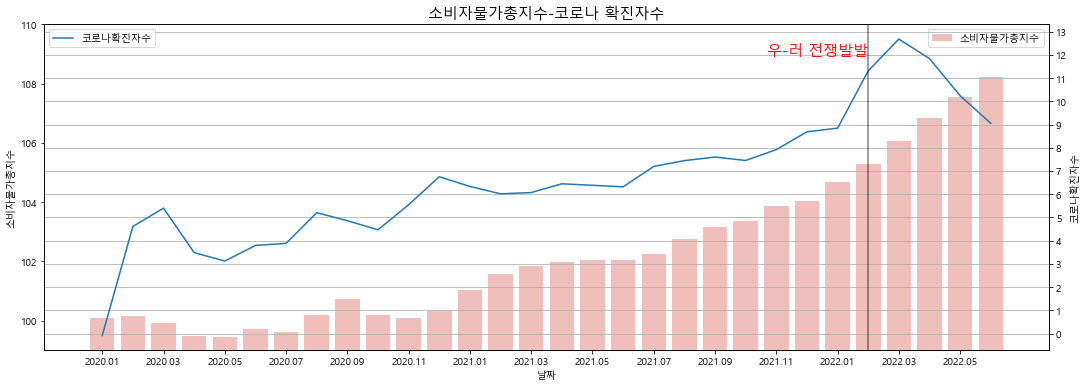

In [170]:
# 소비자물가총지수 동향 그래프
import matplotlib.pyplot as plt
import platform

if platform.system() == "Windows":
    plt.rc('font',family='Malgun Gothic')
else:
    plt.rc('font',family='AppleGothic')
    
colors=sns.color_palette('hls',2)

# x축, y축 지정
x=D_list[12:]
y1=num_list[12:]
y2=np.log(corona_mean_list)

# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.bar(x, y1, label='소비자물가총지수',alpha=0.4, color=colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)

# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='코로나확진자수')
ax2.set_ylabel('코로나확진자수')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-코로나 확진자수', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2)
plt.axvline(x=25, ymin=0, ymax=1.0, color='black', alpha=0.5)
plt.text(x=25, y=12, s='우-러 전쟁발발', fontsize=15, color='r', ha='right')
plt.grid()
plt.show()

In [185]:
# 시리즈로 변환 후 상관계수 구하기
num_series=pd.Series(num_list)
corona_series=pd.Series(np.log(corona_mean_list))
result1=pd.concat([num_series, corona_series], axis=1)
result1=result1.rename(columns={0:'소비자물가총지수', 1:'코로나확진자수'})
result1.corr()

,소비자물가총지수,코로나확진자수
소비자물가총지수,1.000000,0.862249
코로나확진자수,0.862249,1.000000


In [151]:
# DF=pd.read_excel('소비자물가상승률.xlsx', skiprows=2)
# DF=DF.iloc[1, :]
# DF=pd.DataFrame(DF)
# DF.reset_index(inplace=True)DF=DF.iloc[1:, :]
# DF
# plt.plot(DF['index'].tolist(), DF[1].tolist())
# plt.xlabel('연도')
# plt.ylabel('소비자물가상승률')
# plt.legend()
# # plt.xticks(x)
# plt.locator_params(nbins=len(x)/2)
# plt.title('소비자물가상승률', fontsize=15)

코로나로 인한 경제 심리 위축과 

## 소비자물가총지수 - 금리간 관계

In [152]:
# 데이터 전처리
interest_rate=pd.read_csv('금리.csv')
interest_rate=interest_rate.iloc[0]

interest_rate=pd.DataFrame(interest_rate)
interest_rate=interest_rate.fillna(method='ffill')

interest_rate.reset_index(inplace=True)
interest_rate=interest_rate.iloc[4:]

# 날짜 컬럼 설정
Date=pd.date_range('2019.01', '2022.07', freq='m')
interest_rate.insert(1, '날짜', Date)
interest_rate.drop(columns=['index'])
interest_rate_list=interest_rate[0].tolist()

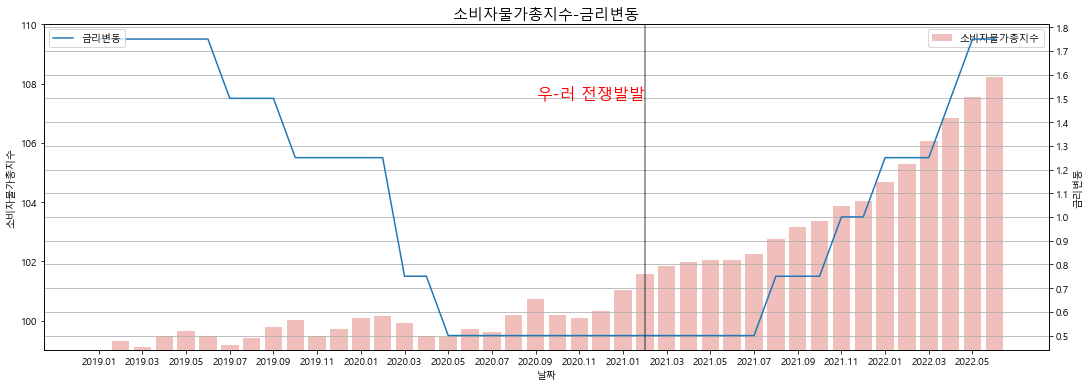

In [172]:
import seaborn as sns
# x축, y축 지정
x=D_list
y1=num_list
y2=interest_rate_list

colors=sns.color_palette('hls',2)
# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.bar(x, y1, label='소비자물가총지수', alpha=0.4, color=colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)
# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='금리변동')
ax2.set_ylabel('금리변동')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-금리변동', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2)
plt.axvline(x=25, ymin=0, ymax=1.0, color='black', alpha=0.5)
plt.text(x=25, y=1.5, s='우-러 전쟁발발', fontsize=16, color='r', ha='right')
plt.grid()
plt.show()

In [186]:
# 시리즈 변환 후 상관계수 구하기
interest_rate_series=pd.Series(interest_rate_list)
result2=pd.concat([num_series, interest_rate_series], axis=1)
result2=result2.rename(columns={0:'소비자물가총지수', 1:'금리변동'})
result2.corr()

,소비자물가총지수,금리변동
소비자물가총지수,1.000000,0.092986
금리변동,0.092986,1.000000


## 소비자물가총지수 - 유가간 관계

In [ ]:
# 데이터 전처리
oil=pd.read_excel('유가가격현황.xlsx')
oil=oil.loc[::-1]
oil=oil.iloc[:, 0:2]
oil

In [ ]:
# 그룹화 위한 MONTH 컬럼 생성
M=oil['날짜'].dt.month
oil.insert(1, "MONTH", M)

# 날짜 컬럼 인덱스 설정
oil.set_index('날짜', inplace =True)

# 연도별 월별 평균값 구하기
oil_2019=oil.loc['2019-01-01':'2019-12-31']
oil2019_group=oil_2019.groupby(by='MONTH')
mean2019=oil2019_group.mean()

oil_2020=oil.loc['2020-01-01':'2020-12-31']
oil2020_group=oil_2020.groupby(by='MONTH')
mean2020=oil2020_group.mean()

oil_2021=oil.loc['2021-01-01':'2021-12-31']
oil2021_group=oil_2021.groupby(by='MONTH')
mean2021=oil2021_group.mean()

oil_2022=oil.loc['2022-01-01':'2022-06-30']
oil2022_group=oil_2022.groupby(by='MONTH')
mean2022=oil2022_group.mean()

oil_mean=pd.concat([mean2019, mean2020, mean2021, mean2022], ignore_index=True)

# 유가 컬럼 리스트 변환
oil_mean_list=oil_mean['종가'].tolist()

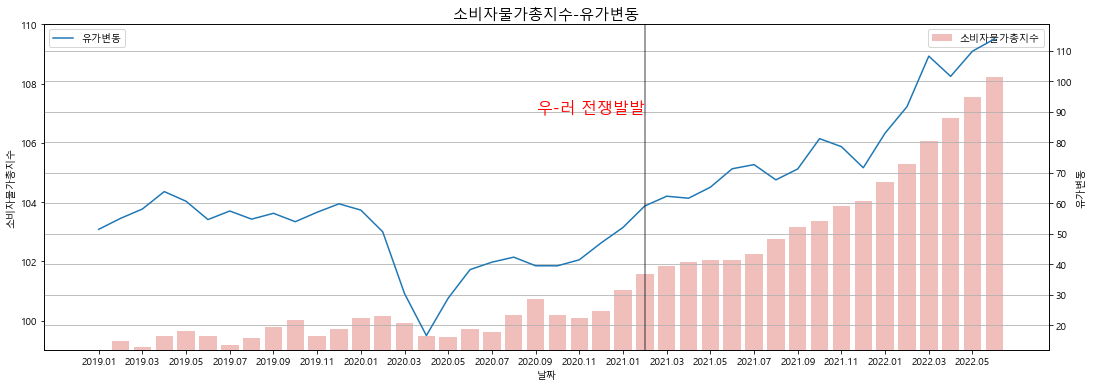

In [182]:
# x축, y축 지정
x=D_list
y1=num_list
y2=oil_mean_list

colors=sns.color_palette('hls',2)
# 다중 플롯 지정
fig, ax1 = plt.subplots(figsize=(18,6))

ax1.bar(x, y1, label='소비자물가총지수', alpha=0.4, color = colors[0])
ax1.set_ylabel('소비자물가총지수')
ax1.legend()
plt.ylim(99, 110)

# x축 공유
ax2 = ax1.twinx()
ax2.plot(x, y2, label='유가변동')
ax2.set_ylabel('유가변동')

ax2.legend(loc='upper left')

plt.title('소비자물가총지수-유가변동', fontsize=15)
ax1.set_xlabel('날짜')
plt.xticks(x)
plt.locator_params(nbins=len(x)/2) 
plt.axvline(x=25, ymin=0, ymax=1.0, color='black', alpha=0.5)
plt.text(x=25, y=90, s='우-러 전쟁발발', fontsize=16, color='r', ha='right')
plt.grid()
plt.show()

In [187]:
# 시리즈 변환 후 상관계수 구하기
oil_mean_series=pd.Series(oil_mean_list)
result3=pd.concat([num_series, oil_mean_series], axis=1)
result3=result3.rename(columns={0:'소비자물가총지수', 1:'유가변동'})
result3.corr()

,소비자물가총지수,유가변동
소비자물가총지수,1.00000,0.87839
유가변동,0.87839,1.00000


## 해외동향 분석

In [ ]:
abroad=pd.read_csv('해외동향.csv')
abroad.head()

In [ ]:
# 데이터 전처리
abroad=abroad[abroad['항목별'].str.contains('소비자물가지수:총지수')]
abroad=abroad[(abroad['항목'].str.contains('중국'))|(abroad['항목'].str.contains('미국'))|(abroad['항목'].str.contains('영국'))]
abroad=abroad.iloc[:3, 1:]
abroad=abroad.set_index(['항목'])
abroad=abroad.drop(columns=['단위'])
abroad=abroad.T

In [ ]:
abroad.reset_index(inplace=True)
abroad=abroad.fillna(method='ffill')
abroad['index']=abroad['index'].apply(lambda x : x.split(' ')[0])                        
abroad['index']=abroad['index'].astype('datetime64')
abroad=abroad.rename(columns={'index':'날짜'})

# 날짜, 국가별 리스트 생성
abroad_date_list=abroad['날짜'].tolist()
abroad_E_list=abroad['영국'].tolist()
abroad_A_list=abroad['미국'].tolist()
abroad_C_list=abroad['[비회원국]중국'].tolist()

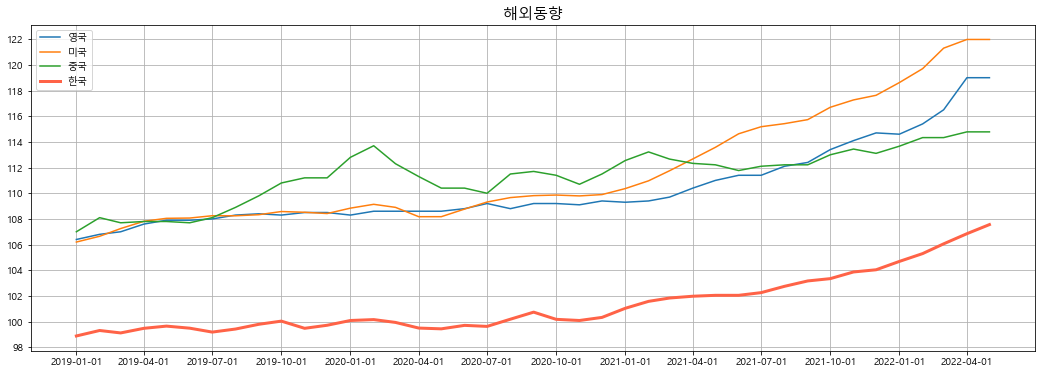

In [181]:
# x축, y축 지정
x=abroad_date_list
y1=abroad_E_list
y2=abroad_A_list
y3=abroad_C_list
y4=num_list[:-1]

plt.figure(figsize=(18,6))
plt.plot(x,y1, x,y2, x,y3)

line=plt.plot(x,y4)

plt.setp(line,'color', 'tomato', 'linewidth', 3.0)
plt.xticks(x)
plt.locator_params(nbins=len(x)/3)
plt.title('해외동향', fontsize=15)
plt.legend(['영국', '미국', '중국', '한국'])
plt.grid()
plt.show()

이러한 물가 불안은 통화량 증가, 물류 공급 차질, 주택 매매 및 임대 가격 상승, 국제 원자재가격 상승 등 복합적인 원인에 기인하고 있어 향후 어떠한 추세를 보일지 예상하기가 매우 어려운 상황임. 특히, 높은 물가 상승은 그 자체로 경제 주체들의 실질구매력을 위축시키는 역할을 하기 때문에 일반 국민들의 경제 여건 개선에도 부담으로 작용할 것으로 예상 